[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aprendizaje-automatico-dc-uba-ar/material/blob/main/notebooks/notebook_11_clustering-published.ipynb) (Este botón no anda, tenemos que ver dónde colgaremos las cosas)


# Práctica 0. Conceptos y herramientas pre-curso.

En este notebook revisaremos algunos conceptos y herramientas básicas que se utilizarán en el curso **Inferencia bayesiana causal** del [Departamento de Computación](https://www.dc.uba.ar/) de la [Facultad de Ciencias Exactas y Naturales](https://exactas.uba.ar/) de la [Universidad de Buenos Aires](https://uba.ar/).



## Sistema de razonamiento en contextos de incertidumbre

A diferencia de las ciencias formales, que validan sus proposiciones derivando teoremas en sistemas axiomáticos cerrados, todas las ciencias empíricas (o ciencias basadas en datos) deben validar sus proposiciones en sistemas naturales abiertos, que contienen siempre algún grado de incertidumbre. 

¿Se puede alcanzar verdades en las ciencias basadas en datos si no podemos evitar decir, en algún punto, "no sé"? Al menos sabemos no mentir: no afirmar más de lo que se sabe, maximizando incertidumbre, pero sin ocultar lo que sí se sabe, icorporando la información disponible.

Las reglas de la probabilidad se conocen desde finales del siglo 18 y desde entonces se han adoptado como sistema de razonamiento en todas las ciencias empíricas (incluida la inteligencia artificial): la regla de la suma, predecir con la contribución de todas las hipótesis; y la regla del producto, preservar la creencia previa que sigue siendo compatible con los datos.

Si bien en todo este tiempo no se ha propuesto nada mejor en términos prácticos, su aplicación se ha visto limitada históricamente debido al alto costo computacional asociado a la evaluación de todo el espacio de hipótesis (todos los posibles universos paralelos). Recién en las vísperas del siglo 21 ha comenzado a ser posible aplicar estrictamente las reglas (enfoque bayesiano) de forma general.

### Lenguaje de programación.  

In [ ]:
!pip install scipy
!pip install pandas
!pip install plotnine
!pip install seaborn
!pip install scikit-learn


### Axiomas de las reglas de la 

## Distribuciones de probabilidad. 

Para realizar un muestreo de distintas distribuciones utilizaremos el paquete `scipy`.

> SciPy es una colección de algoritmos matemáticos y funciones de conveniencia construidas sobre NumPy. Añade un poder significativo a Python al proporcionar al usuario comandos y clases de alto nivel para manipular y visualizar datos. 
Fuente: [Página oficial scipy](https://docs.scipy.org/doc/scipy/tutorial/index.html)

En particular usaremos el módulo `stats` que puede importarse de la siguiente manera

In [1]:
from scipy import stats

Veamos como generar una variables aleatorias de una distribución particular. 
Empecemos con una [uniforme](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform) (recordá que siempre podés ver la documentación ;-)).

$$X \sim Unif(a,b)$$ 

Esta notación indica que la variable aleatoria $X$ se genera con una distribución uniforme en el intervalo $[a, b]$. En python definimos la distribución uniforme de la siguiente manera:


In [5]:
a = 0
b = 1
X = stats.uniform(a, b-a)

Definimos así la variable `X` ahora es una variable aleatoria, un objeto  clase de python para obtener diferentes cosas:

 - `rvs(loc=0, scale=1, size=1, random_state=None)` obtener muestras de la distribución
 - `pdf(x, loc=0, scale=1)` obtiene el valor de la densidad
 - `logpdf(x, loc=0, scale=1)` idem anterior pero en escala $log$
 - `cdf(x, loc=0, scale=1)` función de distribución acumulada

**Ejercicio**: 

Obtener, mediante una muestra de 1000 puntos equidistantes en el intervalo $[1.5, 3.5]$, el valor de la densidad puntual y la acumulada de una uniforme(2, 3).
Además obtener mil muestras de dicha variable aleatoria.

Consejo: para este ejericio explorar la función linspace de numpy

In [ ]:
import numpy as np

X = ...

xs = np.linspace(...)
dp = ...
dacum = ...
muestras = ..

# posible idea de resolucion
for x in xs:
    ... COMPLETAR ...

Veamos de graficar los valores obtenidos.

Para esto será necesario incluir entre nuestras herramientas algún paquete graficador. Existen varios: [matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/), [plotnine](https://plotnine.org/tutorials/). 
En este caso exploraremos el último, por su potencia y por su gramática de construcción. Originariamente fue desarrollado en el marco del lenguaje R.

La idea de un gráfico en `plotnine` consiste en atar datos al gráfico y luego aplicarle capas que usan esos datos. En las sucesivas capas es posible ir modificando cosas, incluso cambiar los datos para el mismo gráfico. Por lo general toma como entrada un `DataFrame` de `pandas` por lo que aprovechamos para introducir esta estructura también.

Realicemos 3 gráficos.

In [5]:
import pandas as pd
from plotnine import ggplot, aes, ggtitle, geom_point, facet_grid, geom_histogram, ylab, theme_xkcd, geom_abline, xlim, ylim, geom_density_2d # completar con las funciones que uses

/home/landfried/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


/tmp/ipykernel_29095/3523968255.py:7: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/home/landfried/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Sans MS' n

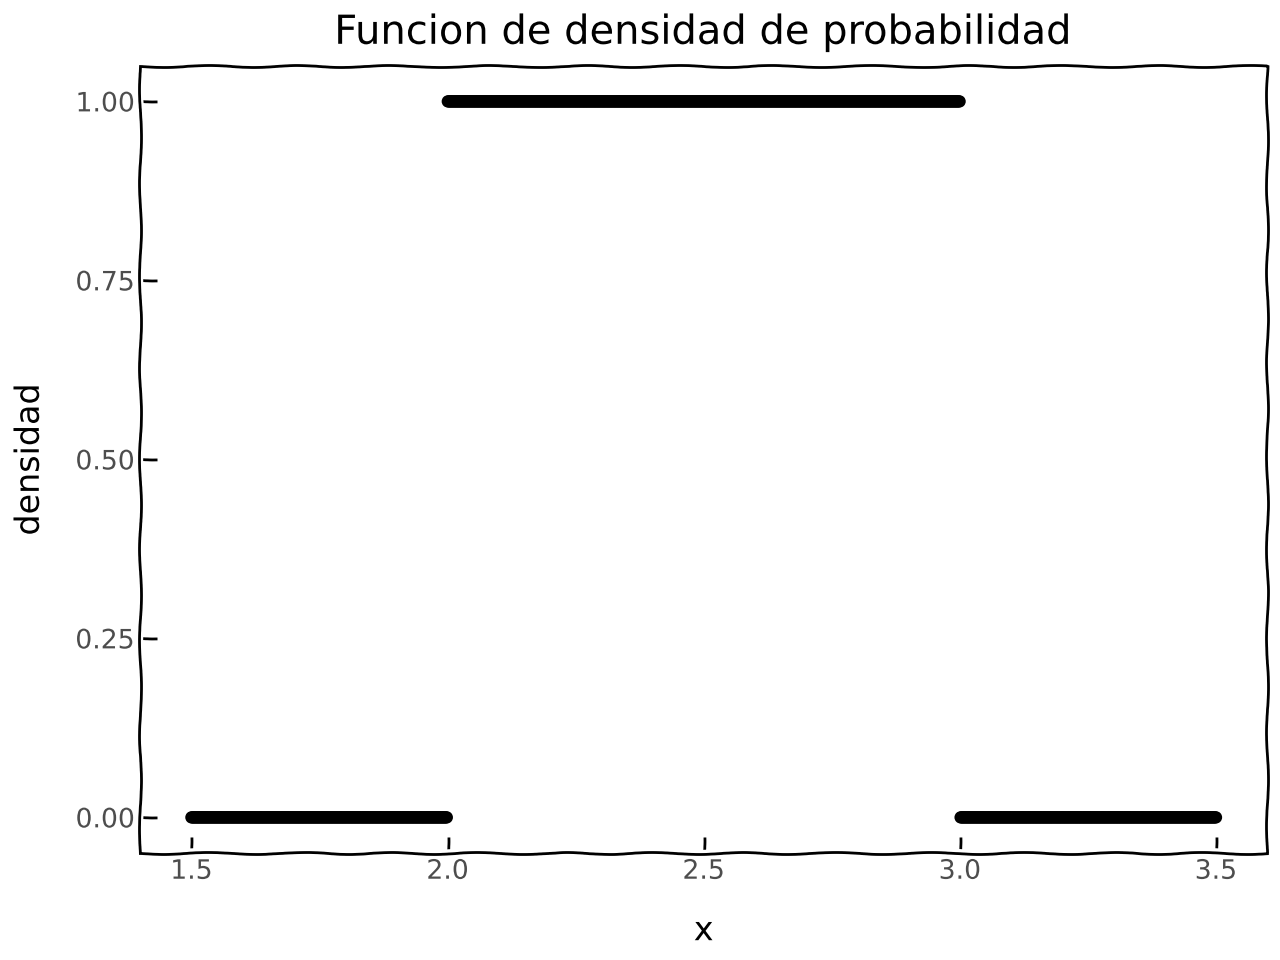

In [6]:
g1 = (
    ggplot(pd.DataFrame({'x': xs, 'densidad': dp}), aes(x='x', y='densidad')) +
    geom_point() +
    ggtitle('Funcion de densidad de probabilidad') +
    theme_xkcd()
)
print(g1)

/tmp/ipykernel_29095/535768183.py:7: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font 

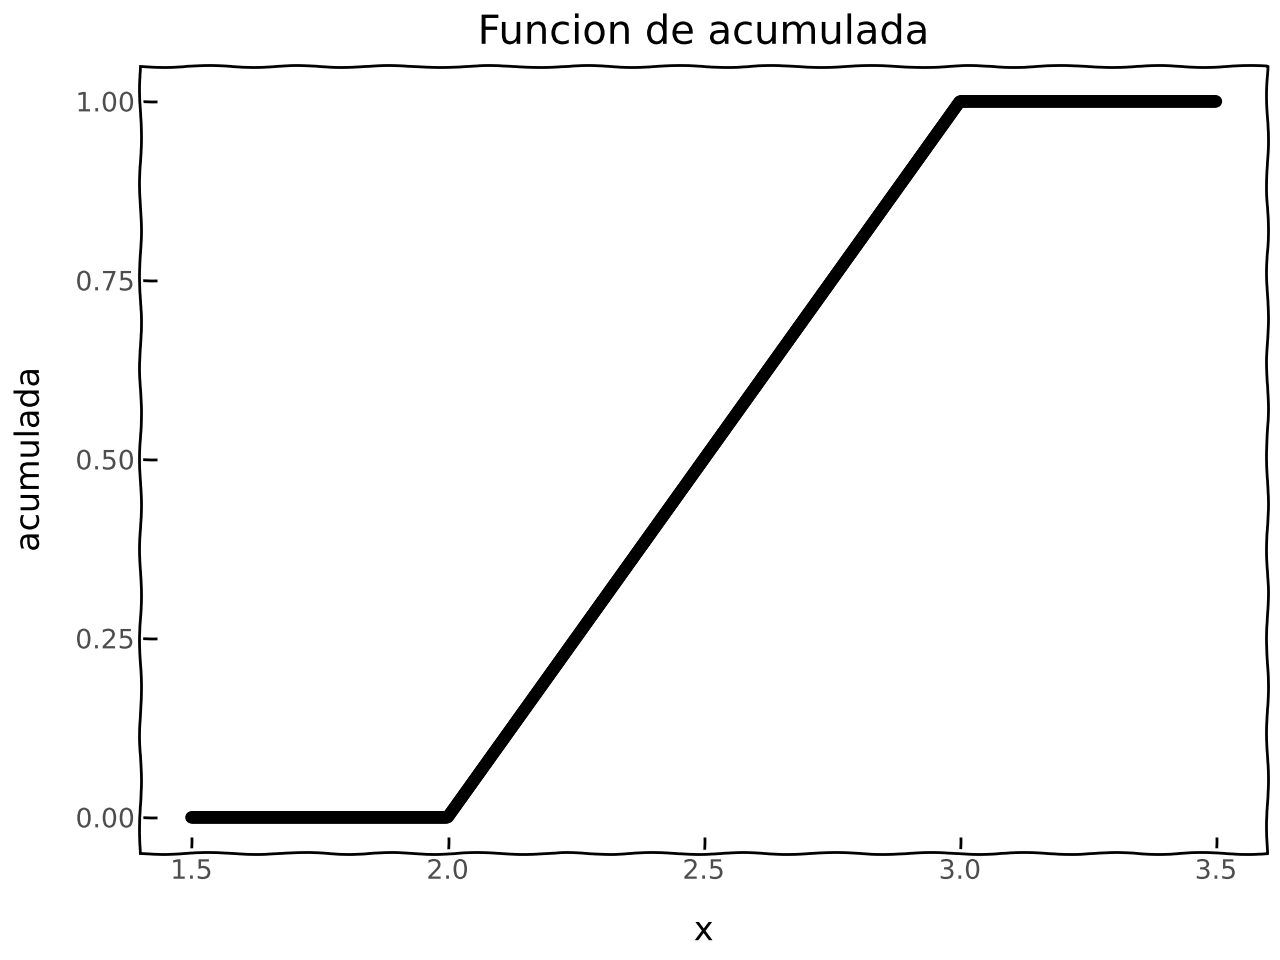

In [7]:
g2 = (
    ggplot(pd.DataFrame({'x': xs, 'acumulada': dacum}), aes(x='x', y='acumulada')) +
    geom_point() +
    ggtitle('Funcion de acumulada') +
    theme_xkcd()
)
print(g2)

Para graficar las muestras podemos hacer un histograma, que divide el espacio en segmentos y cuenta cuántos puntos hay en cada uno de ellos.

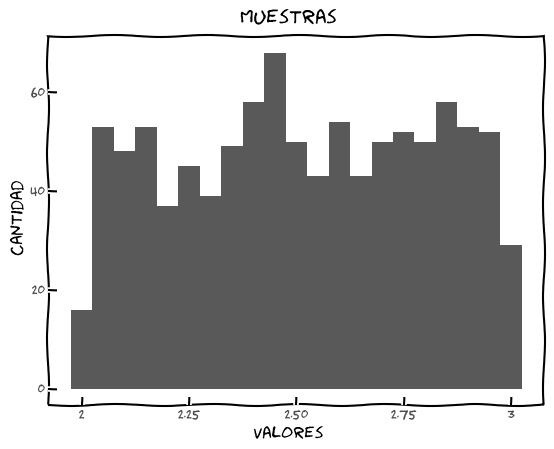

In [32]:
g3 = (
    ggplot(pd.DataFrame({'Valores': muestras}), aes(x='Valores')) +
    geom_histogram(binwidth=0.05) +
    ggtitle('Muestras') +
    theme_xkcd() +
    ylab("Cantidad")
)
print(g3)

**Ejercicio**: Explorar el paquete `scipy` y repetir el ejercicio anterior pero para una variable aleatoria con [distribución normal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) con todas las combinaciones de parámetros:

  - media: -1, 0, 1
  - desvío estandar: 0.5, 1, 1.5

**Ejercicio**: Simular y generar datos que tengan 2 dimensiones independientes y que a su vez vengan de Normales:

   - Una con media 5 y desvío 0.5
   - La segunda con media -1 y desvío 3

Generar mil datos y graficarlos cuidando de mantener la relación 1 a 1 entre los ejes (es decir, tanto el eje X como el Y deben mostrar el mismo intervalo).

# Lectura de datos

En esta sección vamos a leer datos de un archivo, modificarlos, hacer cálculos y graficarlos. Este conjunto de datos presenta la altura de una persona, su género, la contextura física de la madre y la altura de la misma.

In [37]:
# df = pd.read_csv('https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectWC/data/attacks.csv', encoding = "ISO-8859-1")
df = pd.read_csv('data_00_alturas.csv')

df.head()

,id,altura,genero,contextura_madre,altura_madre
0,1,172.7,M,mediana,159.8
1,2,171.5,M,mediana,160.3
2,3,162.6,F,mediana,160.5
3,4,174.1,M,mediana,159.8
4,5,168.3,M,mediana,158.3


En una nueva columna llamada `diferencia` calcular la diferencia entre la altura de la persona y la de la madre.

In [38]:
df['diferencia'] = df["altura"] - df["altura_madre"]
df.head()

,id,altura,genero,contextura_madre,altura_madre,diferencia
0,1,172.7,M,mediana,159.8,12.9
1,2,171.5,M,mediana,160.3,11.2
2,3,162.6,F,mediana,160.5,2.1
3,4,174.1,M,mediana,159.8,14.3
4,5,168.3,M,mediana,158.3,10.0


Grafiquemos la diferencia

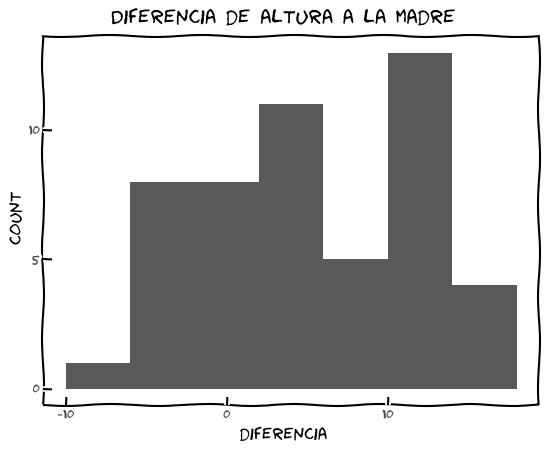

In [39]:
g1 = (
    ggplot(df, aes(x='diferencia')) +
    geom_histogram(binwidth=4) +
    ggtitle('Diferencia de altura a la madre') +
    theme_xkcd()
)
print(g1)

Grafiquemos la diferencia pero separada por género.

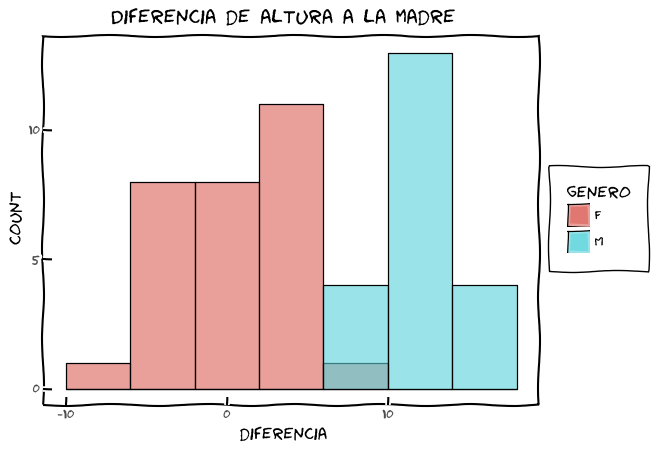

In [40]:
g1 = (
    ggplot(df, aes(x='diferencia', fill="genero")) +
    geom_histogram(binwidth=4, alpha=0.6, color="black", position = 'identity') +
    ggtitle('Diferencia de altura a la madre') +
    theme_xkcd()
)
print(g1)

**Ejercicio**: Encontrar los mejores $\beta_0$ y $\beta_1$ para que en este conjunto de datos la formula:

$$ \text{altura} = \beta_0 + \text{altura\_madre} \times \beta_1 $$

Para ello explorar (varios o muchos) valores. Elegir un intervalo de exploración razonable, sino se te ocurre cual podés probar entre 10 y 15 para $\beta_0$ y entre -0.5 y 1.5 para $\beta_1$.

1. ¿Qué criterio usaste para elegir el mejor?

1. Realizar un gráfico siguiendo los siguientes lineamientos:

    - en el eje x esté la altura de la madre
    - en el eje y este la altura
    - cada persona sea un punto (determinado por los ejes)
    - calcular los valores de la recta definida según la ecuación anterior y graficarla sobre los puntos